In [1]:
from bs4 import BeautifulSoup

import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns

In [4]:
f = csv.writer(open('krisha.csv', 'w'))
f.writerow(['District','Rooms','Size','Floor',"Price"])
pages=[]
n=0;
for i in range(1,200):
    #2000
    url = 'https://krisha.kz/prodazha/kvartiry/almaty/?page=' + str(i)
    pages.append(url)
    
for item in pages:
    request  = requests.get(item)
    soup = BeautifulSoup(request.text, 'html.parser')
    main = soup.find(class_='a-list a-search-list a-list-with-favs')
    
    prices = main.find_all(class_ ='a-card__price')
    locations = main.find_all(class_ ='a-card__wrapper-subtitle')
    roomshot = main.find_all(class_ ='a-card__title tm-click-checked-hot-adv')
    rooms = main.find_all(class_ ='a-card__title')
    roomsArr=[]
    pricesArr=[]
    locationsArr=[]
    pages=[]
    for item in prices:
        pricesArr.append(item.text)
    for item in locations:
        locationsArr.append(item.text)
    for item in roomshot:
        roomsArr.append(item.text)
    for item in rooms:
        roomsArr.append(item.text)
    
    for i in range(len(locationsArr)):
        rooms=roomsArr[i].replace (" ", "").replace ("\n", "").split(",")
        location=locationsArr[i].replace (" ", "").replace ("\n", "").split(",")
        prices=pricesArr[i].replace (" ", "").replace ("\n", "").replace ("от", "")
        prices = prices[:-1]
        
        if(len(rooms)==3 and str(location[0][len(location[0])-1])=="н" and len(prices)==11):
            prices=int(prices[0:2]+prices[3:6]+prices[7:11])
            prices=int(prices/387%1000)
            if(len(str(prices))==3):
                    
                f.writerow([location[0].replace ("р-н", "").replace ("р - н", ""),str(rooms[0].replace ("-комнатнаяквартира", "")), int(float(rooms[1].split("м")[0])),str(rooms[2].split("/")[0].replace("этаж","")),prices])
        
        

In [ ]:
f = csv.writer(open('krishaAstana.csv', 'w'))
f.writerow(['District','Rooms','Size','Floor',"Price"])
pages=[]
n=0;
for i in range(1, 200):
    #2000
    url = 'https://krisha.kz/prodazha/kvartiry/astana/?page=' + str(i)
    pages.append(url)
    
for item in pages:
    request  = requests.get(item)
    soup = BeautifulSoup(request.text, 'html.parser')
    main = soup.find(class_='a-list a-search-list a-list-with-favs')
    
    prices = main.find_all(class_ ='a-card__price')
    locations = main.find_all(class_ ='a-card__wrapper-subtitle')
    roomshot = main.find_all(class_ ='a-card__title tm-click-checked-hot-adv')
    rooms = main.find_all(class_ ='a-card__title')
    roomsArr=[]
    pricesArr=[]
    locationsArr=[]
    pages=[]
    for item in prices:
        pricesArr.append(item.text)
    for item in locations:
        locationsArr.append(item.text)
    for item in roomshot:
        roomsArr.append(item.text)
    for item in rooms:
        roomsArr.append(item.text)
    
    for i in range(len(locationsArr)):
        rooms=roomsArr[i].replace (" ", "").replace ("\n", "").split(",")
        location=locationsArr[i].replace (" ", "").replace ("\n", "").split(",")
        prices=pricesArr[i].replace (" ", "").replace ("\n", "").replace ("от", "")
        prices = prices[:-1]
        
        if(len(rooms)==3 and str(location[0][len(location[0])-1])=="н" and len(prices)==11):
            prices=int(prices[0:2]+prices[3:6]+prices[7:11])
            f.writerow([location[0].replace ("р-н", "").replace ("р - н", ""),str(rooms[0].replace ("-комнатнаяквартира", "")), int(float(rooms[1].split("м")[0])),str(rooms[2].split("/")[0]),int(prices/387)])
        
        

In [66]:
dfAstana = pd.read_csv('krishaAstana.csv')


In [68]:
dfAstana.shape

(3002, 5)

In [69]:
dfAstana.head(20)

,District,Rooms,Size,Floor,Price
0,Есильский,1-комнатная,40.60,2,31007
1,Сарыаркинский,1-комнатная,43.20,10,35917
2,Есильский,3-комнатная,100.00,2,76227
3,Есильский,1-комнатная,40.60,2,67183
4,Есильский,3-комнатная,100.00,2,80620
5,Сарыаркинский,3-комнатная,89.70,1,47803
6,Есильский,3-комнатная,60.00,5,35658
7,Есильский,4-комнатная,160.00,2,94315
8,Сарыаркинский,2-комнатная,61.50,7,66925
9,Алматинский,1-комнатная,39.10,3,44832


In [70]:
avg_prices=[]
avg_prices.append(dfAstana[(dfAstana['Rooms'] == "1-комнатная")]['Price'].mean()),\
avg_prices.append(dfAstana[(dfAstana['Rooms'] == "2-комнатная")]['Price'].mean()),\
avg_prices.append(dfAstana[(dfAstana['Rooms'] == "3-комнатная")]['Price'].mean()),\
avg_prices.append(dfAstana[(dfAstana['Rooms'] == "4-комнатная")]['Price'].mean())
name_of_rooms=["1-комнатная","2-комнатная","3-комнатная","4-комнатная"]

In [71]:
data = {'Avg_Prices':avg_prices, 'Rooms':name_of_rooms}
custom_df3 = pd.DataFrame(data)
custom_df3.head()

,Avg_Prices,Rooms
0,43667.686357,1-комнатная
1,56738.722004,2-комнатная
2,82123.667738,3-комнатная
3,127610.016340,4-комнатная


In [ ]:
df = pd.read_csv('krisha.csv')


In [ ]:
df.shape



In [ ]:
df.head(20)

In [75]:

df.describe()


,Size,Price
count,3549.000000,3549.000000
mean,71.120400,74593.522964
std,35.671577,44838.002005
min,9.000000,25839.000000
25%,46.000000,42635.000000
50%,63.000000,60723.000000
75%,85.000000,90440.000000
max,435.000000,258139.000000


In [76]:
avg_prices=[]
avg_prices.append(df[(df['District'] == "Ауэзовский")&(df["Rooms"]=="1-комнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Ауэзовский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Ауэзовский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
avg_prices.append(df[(df['District'] == "Медеуский")&(df["Rooms"]=="1-комнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Медеуский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Медеуский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
avg_prices.append(df[(df['District'] == "Алмалинский")&(df["Rooms"]=="1-комнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Алмалинский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Алмалинский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
avg_prices.append(df[(df['District'] == "Бостандыкский")&(df["Rooms"]=="1-комнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Бостандыкский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Бостандыкский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
avg_prices.append(df[(df['District'] == "Жетысуский")&(df["Rooms"]=="1-кaомнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Жетысуский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Жетысуский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
avg_prices.append(df[(df['District'] == "Алатауский")&(df["Rooms"]=="1-комнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Алатауский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Алатауский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
avg_prices.append(df[(df['District'] == "Турксибский")&(df["Rooms"]=="1-комнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Турксибский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Турксибский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
avg_prices.append(df[(df['District'] == "Наурызбайский")&(df["Rooms"]=="1-комнатная")&(df["Size"]<45)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Наурызбайский")&(df["Rooms"]=="2-комнатная")&(df["Size"]>45)&(df["Size"]<75)]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Наурызбайский")&(df["Rooms"]=="3-комнатная")&(df["Size"]>75)&(df["Size"]<120)]['Price'].mean())
name_of_avg_prices=["Ауэзовский(1)","Ауэзовский(2)","Ауэзовский(3)","Медеуский(1)","Медеуский(2)","Медеуский(3)","Алмалинский(1)","Алмалинский(2)","Алмалинский(3)","Бостандыкский(1)","Бостандыкский(2)","Бостандыкский(3)","Жетысуский(1)","Жетысуский(2)","Жетысуский(3)","Алатауский(1)","Алатауский(2)","Алатауский(3)","Турксибский(1)","Турксибский(2)","Турксибский(3)","Наурызбайский(1)","Наурызбайский(2)","Наурызбайский(3)"]

In [77]:
data = {'Avg_Prices':avg_prices, 'District':name_of_avg_prices}
custom_df = pd.DataFrame(data)
custom_df.head()

,Avg_Prices,District
0,38479.673077,Ауэзовский(1)
1,54448.282759,Ауэзовский(2)
2,77705.025974,Ауэзовский(3)
3,70782.339623,Медеуский(1)
4,80529.546218,Медеуский(2)


In [78]:
avg_prices=[]
avg_prices.append(df[(df['District'] == "Ауэзовский")]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Медеуский")]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Алмалинский")]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Бостандыкский")]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Жетысуский")]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Алатауский")]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Турксибский")]['Price'].mean()),\
avg_prices.append(df[(df['District'] == "Наурызбайский")]['Price'].mean())
name_of_avg_prices=["Ауэзовский","Медеуский","Алмалинский","Бостандыкский","Жетысуский","Алатауский","Турксибский","Наурызбайский",]

In [79]:
data = {'Avg_Prices':avg_prices, 'District':name_of_avg_prices}
custom_df1 = pd.DataFrame(data)
custom_df1.head()

,Avg_Prices,District
0,53873.090287,Ауэзовский
1,101342.321569,Медеуский
2,67182.456860,Алмалинский
3,94029.499076,Бостандыкский
4,43584.637500,Жетысуский


In [80]:
avg_prices=[]
avg_prices.append(df[(df['Rooms'] == "1-комнатная")]['Price'].mean()),\
avg_prices.append(df[(df['Rooms'] == "2-комнатная")]['Price'].mean()),\
avg_prices.append(df[(df['Rooms'] == "3-комнатная")]['Price'].mean()),\
avg_prices.append(df[(df['Rooms'] == "4-комнатная")]['Price'].mean())
name_of_rooms=["1-комнатная","2-комнатная","3-комнатная","4-комнатная"]

In [81]:
data = {'Avg_Prices':avg_prices, 'Rooms':name_of_rooms}
custom_df2 = pd.DataFrame(data)
custom_df2.head()

,Avg_Prices,Rooms
0,48493.037552,1-комнатная
1,65770.687500,2-комнатная
2,86659.154553,3-комнатная
3,114887.111111,4-комнатная


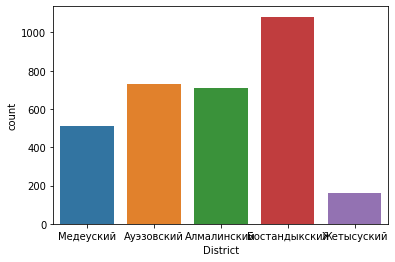

In [82]:

sns.countplot(df[df['District'].\
                 isin(df['District'].value_counts().head().index)]['District']);



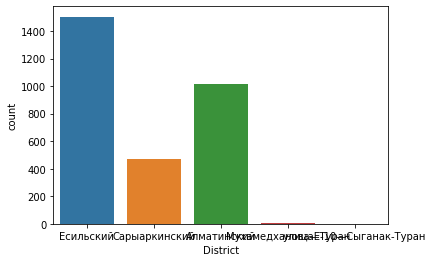

In [83]:
sns.countplot(dfAstana[dfAstana['District'].\
                 isin(dfAstana['District'].value_counts().head().index)]['District']);

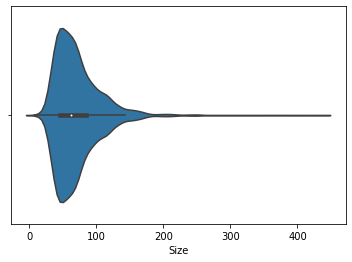

In [84]:
sns.violinplot(df['Size']);


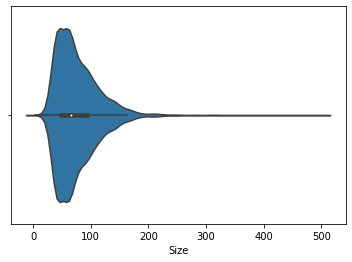

In [85]:
sns.violinplot(dfAstana['Size']);

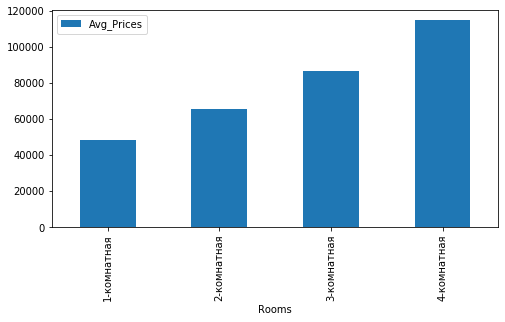

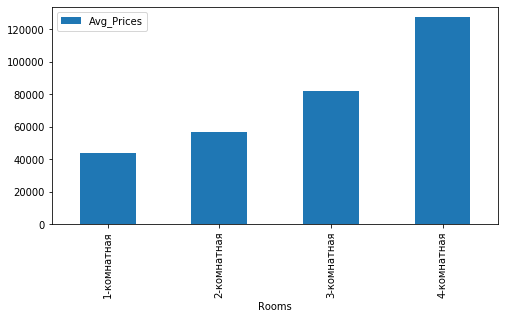

In [86]:
custom_df2.plot(x = 'Rooms', y = 'Avg_Prices', figsize=(8,4),kind = 'bar')
custom_df3.plot(x = 'Rooms', y = 'Avg_Prices', figsize=(8,4),kind = 'bar')

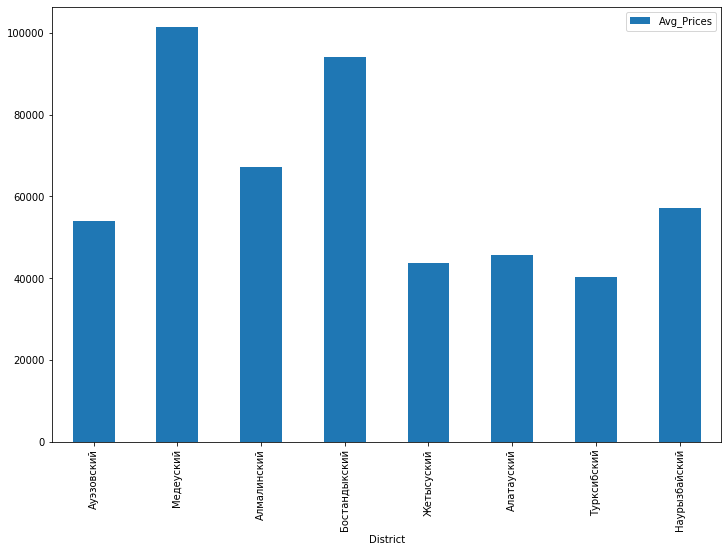

In [87]:

custom_df1.plot(x = 'District', y = 'Avg_Prices', figsize=(12,8),kind = 'bar')

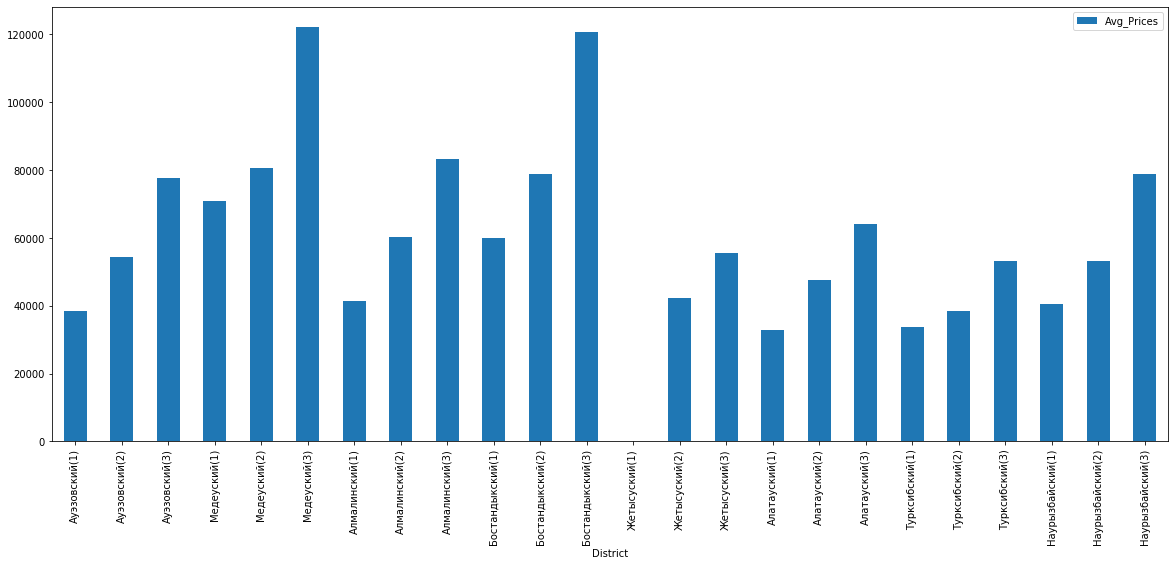

In [88]:

custom_df.plot(x = 'District', y = 'Avg_Prices', figsize=(20,8),kind = 'bar')